In [ ]:
!pip install wordcloud

In [ ]:
#import required libraries
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
import html
from sklearn.metrics import classification_report
import spacy

In [ ]:
# Download necessary NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Importing data in collab
data=pd.read_excel('/content/drugsCom_raw.xlsx')
data

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79


In [ ]:
#dataset preview
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [ ]:
data.tail()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,2014-12-13,116


# **EDA process**

In [ ]:
# Drop multiple columns by name
data.drop(columns=['Unnamed: 0', 'drugName', 'rating', 'date', 'usefulCount'], axis=1, inplace=True)

In [ ]:
data['condition'].value_counts()

,count
condition,
Birth Control,28788
Depression,9069
Pain,6145
Anxiety,5904
Acne,5588
...,...
26</span> users found this comment helpful.,1
Patent Ductus Arteriosus,1
Scleroderma,1


In [ ]:
# Focus only on selected conditions
selected_conditions=['Depression','High Blood Pressure','Diabetes, Type 2']
df=data[data['condition'].isin(selected_conditions)]
df

,condition,review
11,Depression,"""I have taken anti-depressants for years, with..."
31,Depression,"""1 week on Zoloft for anxiety and mood swings...."
44,Depression,"""my gp started me on Venlafaxine yesterday to ..."
50,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l..."
67,Depression,"""This medicine saved my life. I was at my wits..."
...,...,...
161251,High Blood Pressure,"""It is fourth blood pressure pill for me. It f..."
161258,High Blood Pressure,"""While on Bystolic my feet and arms were numb...."
161278,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p..."
161286,Depression,"""This is the third med I&#039;ve tried for anx..."


In [ ]:
df['condition'].value_counts()

,count
condition,
Depression,9069
"Diabetes, Type 2",2554
High Blood Pressure,2321


In [ ]:
df=df.dropna()
df

,condition,review
11,Depression,"""I have taken anti-depressants for years, with..."
31,Depression,"""1 week on Zoloft for anxiety and mood swings...."
44,Depression,"""my gp started me on Venlafaxine yesterday to ..."
50,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l..."
67,Depression,"""This medicine saved my life. I was at my wits..."
...,...,...
161251,High Blood Pressure,"""It is fourth blood pressure pill for me. It f..."
161258,High Blood Pressure,"""While on Bystolic my feet and arms were numb...."
161278,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p..."
161286,Depression,"""This is the third med I&#039;ve tried for anx..."


In [ ]:
# Text Cleaning & Preprocessing
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

def clean_text(text):
  # 1. Lowercase
  text=text.lower()

  # 2. Remove HTML tags and numbers
  text=re.sub(r'<.*?>','',text)
  text=re.sub(r'\d+','',text)

  # 3. Decode HTML entities like &#039;
  text = html.unescape(text)

  # 4. Remove punctuation
  text=text.translate(str.maketrans('','',string.punctuation))

  # 4. Tokenize
  tokens = word_tokenize(text)

  # 5. Remove stopwords
  tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

  # 6. Lemmatize
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

  # 7. Rejoin
  return ' '.join(lemmatized_tokens)

In [ ]:
# Apply cleaning
df['clean_review'] = df['review'].apply(clean_text)


In [ ]:
# Drop duplicates and very short reviews
df = df.drop_duplicates(subset='clean_review')
df = df[df['clean_review'].str.split().str.len() > 5]

In [ ]:
# Named Entity Recognition (NER)
# Load spaCy English model
nlp = spacy.load('en_core_web_sm')
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df['entities'] = df['review'].apply(extract_entities)
print(df[['review', 'entities']].head())


                                               review  \
11  "I have taken anti-depressants for years, with...   
31  "1 week on Zoloft for anxiety and mood swings....   
44  "my gp started me on Venlafaxine yesterday to ...   
50  "Hey Guys,  It&#039;s been 4 months since my l...   
67  "This medicine saved my life. I was at my wits...   

                                             entities  
11  [(years, DATE), (Cymbalta, PRODUCT), (Deplin, ...  
31  [(1 week, DATE), (Zoloft, GPE), (50, CARDINAL)...  
44  [(Venlafaxine, ORG), (yesterday, DATE), (a hou...  
50  [(Hey Guys, WORK_OF_ART), (4 months, DATE), (a...  
67  [(Effexor XR, FAC), (the first couple days, DA...  


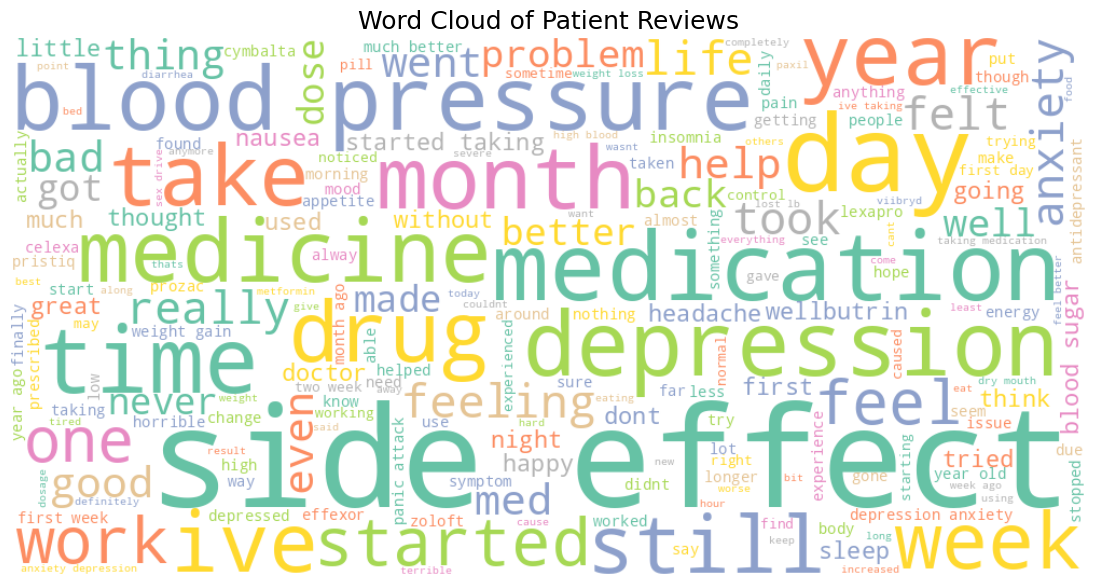

In [ ]:
# Word Cloud Visualization
text_corpus = ' '.join(df['clean_review'])

wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='Set2').generate(text_corpus)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Patient Reviews", fontsize=18)
plt.show()


In [ ]:
# Feature Extraction
x = df['clean_review']
y = df['condition']

In [ ]:
x

,clean_review
11,taken antidepressant year improvement mostly m...
31,week zoloft anxiety mood swing take morning br...
44,started venlafaxine yesterday help depression ...
50,hey guy month since last post wanted give mont...
67,medicine saved life wit end antidepressant rea...
...,...
161132,ive effexor several year suffered severe sexua...
161181,pill yr started pain relief soon discovered de...
161258,bystolic foot arm numb blood sugar became seve...
161286,third med ive tried anxiety mild depression we...


In [ ]:
y

,condition
11,Depression
31,Depression
44,Depression
50,"Diabetes, Type 2"
67,Depression
...,...
161132,Depression
161181,Depression
161258,High Blood Pressure
161286,Depression


In [ ]:
# TF-IDF Vectorization
tf=TfidfVectorizer()
tfidf=tf.fit_transform(x)
tfidf=pd.DataFrame(tfidf.toarray(),columns=tf.get_feature_names_out())
tfidf

,aaf,ab,abate,abated,abating,abdo,abdomen,abdominal,abide,abilfyand,...,zoplicone,zoryl,zpots,zuchiinni,zumba,zyban,zyprexa,zyprexai,zyprexia,zzzquil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Label Encoding
le=LabelEncoder()
y=le.fit_transform(y)
y_encoded=pd.DataFrame(y,columns=['condition'])
y_encoded
class_names=le.classes_

In [ ]:
# Train-test split
x_train,x_test,y_train,y_test=train_test_split(tfidf,y_encoded,test_size=0.2,random_state=0)

In [ ]:
x_train

,aaf,ab,abate,abated,abating,abdo,abdomen,abdominal,abide,abilfyand,...,zoplicone,zoryl,zpots,zuchiinni,zumba,zyban,zyprexa,zyprexai,zyprexia,zzzquil
9339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.260168,0.174256,0.0,0.0
8783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
9225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [ ]:
y_train

,condition
9339,0
377,0
2917,0
4622,0
8783,2
...,...
7891,0
9225,0
4859,0
3264,0


In [ ]:
x_test

,aaf,ab,abate,abated,abating,abdo,abdomen,abdominal,abide,abilfyand,...,zoplicone,zoryl,zpots,zuchiinni,zumba,zyban,zyprexa,zyprexai,zyprexia,zzzquil
5155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test

,condition
5155,2
3812,0
7277,0
3132,1
8660,0
...,...
700,0
2761,0
1621,0
460,0


In [ ]:
# Logistic Regression
logreg_params={
    'C':[0.1,1,10],
    'solver':['liblinear']
}
logreg=GridSearchCV(LogisticRegression(max_iter=1000),logreg_params,cv=5,scoring='accuracy')
logreg.fit(x_train,y_train)
logreg_best=logreg.best_estimator_
logreg_pred=logreg_best.predict(x_test)

print(classification_report(y_test,logreg_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1219
           1       0.97      0.89      0.93       306
           2       0.94      0.87      0.90       363

    accuracy                           0.95      1888
   macro avg       0.95      0.91      0.93      1888
weighted avg       0.95      0.95      0.95      1888



In [ ]:
# Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = GridSearchCV(RandomForestClassifier(random_state=0), rf_params, cv=5, scoring='accuracy')
rf.fit(x_train, y_train)
rf_best = rf.best_estimator_
rf_pred = rf_best.predict(x_test)

print(classification_report(y_test,rf_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1219
           1       0.97      0.83      0.90       306
           2       0.96      0.74      0.83       363

    accuracy                           0.92      1888
   macro avg       0.94      0.85      0.89      1888
weighted avg       0.92      0.92      0.91      1888

